# Fourier Transform

A small notebook to demonstrate the DFT of a sampled signal f(x)

In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [379]:
def f(x):
    return 1.5 * np.cos(x) + 0.25 * np.sin(x) + 2 * np.sin(2*x) + np.sin(3*x)

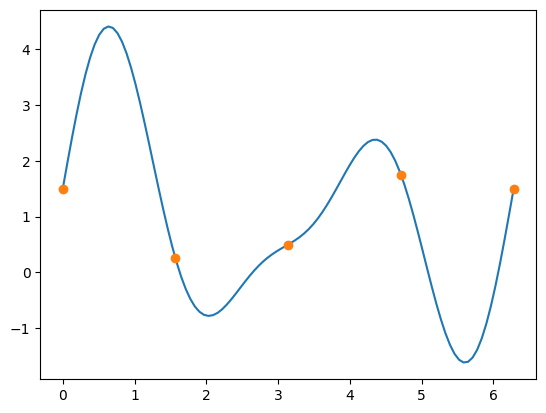

In [380]:
N_SAMPLES = 5

x_curve = np.linspace(0, 2*np.pi, 100)
x_points = np.linspace(0, 2*np.pi, N_SAMPLES)

plt.plot(x_curve, f(x_curve))
plt.plot(x_points, f(x_points), 'o')


In [381]:
# Take the Fourier transform of the function
fhat = np.fft.fft(f(x_points), N_SAMPLES)

# Output the Fourier transform as a table pandas DataFrame
df = pd.DataFrame({
    'f(x)': f(x_points),
    'dft': [f"{real:.2f} + {imag:.2f}i" for real, imag in zip(fhat.real, fhat.imag)],
})

df.T

,0,1,2,3,4
f(x),1.5,0.25,0.5,1.75,1.5
dft,5.50 + 0.00i,0.22 + 1.92i,0.78 + -0.45i,0.78 + 0.45i,0.22 + -1.92i


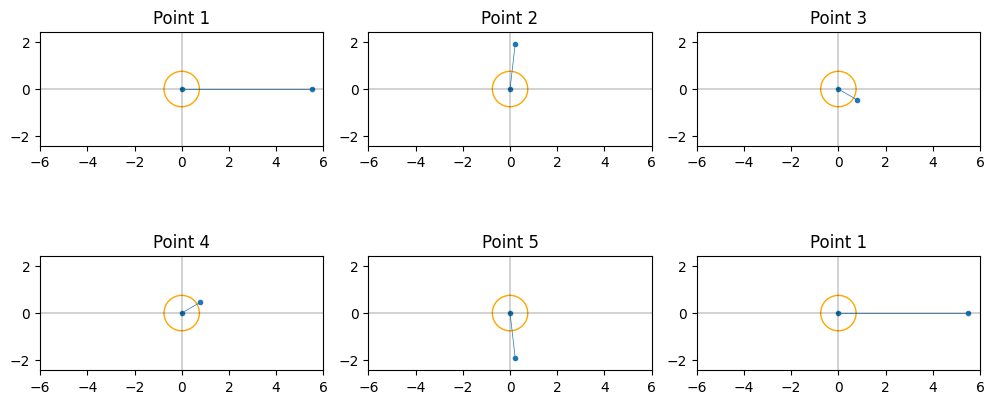

In [382]:
# Plotting the unit circles
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
padding = 0.5
# fig.dpi = 360

# Adjusting the points to include the first point twice
reals =  list(fhat.real[0:]) + [fhat.real[0]]
imags =  list(fhat.imag[0:]) + [fhat.imag[0]]

for idx, ax in enumerate(axes.ravel()): 
    real = reals[idx] if idx < len(reals) else fhat.real[0]
    imag = imags[idx] if idx < len(imags) else fhat.imag[0]

    ax.plot([0, real], [0, imag], 'o-', linewidth=0.5, markersize=3)
    
    ax.set_xlim(-max(abs(fhat.real)) - padding, max(abs(fhat.real)) + padding)
    ax.set_ylim(-max(abs(fhat.imag)) - padding, max(abs(fhat.imag)) + padding)
    ax.set_aspect('equal', adjustable='box')
    ax.axhline(0, color='black',linewidth=0.25)
    ax.axvline(0, color='black',linewidth=0.25)
    circle = plt.Circle((0, 0), 0.75, color='orange', fill=False)
    ax.add_artist(circle)
    ax.set_title(f'Point {(idx % 5) + 1}')

plt.tight_layout()
plt.show()


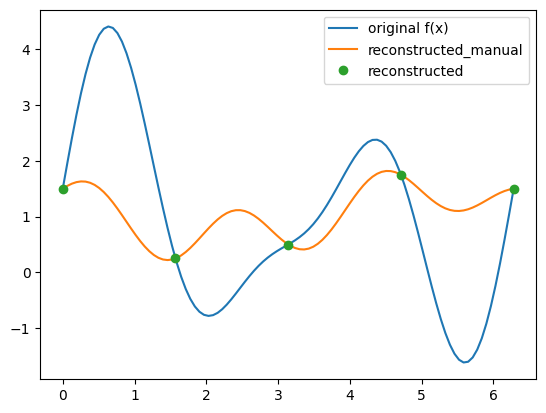

In [393]:
reconstructed = np.fft.ifft(fhat).real
reconstructed_manual = np.zeros_like(x_points, dtype=np.complex128)

dt = x_points[1] - x_points[0] # Spacing between data points
T = N_SAMPLES * dt # Period of the signal

def reconstructed_manual_function(x):
    reconstructed_manual = np.zeros_like(x, dtype=np.complex128)
    for n in range(N_SAMPLES):
        freq = n / T # Corresponding frequency for this coefficient
        coeff = fhat[n] # The coefficient itself
        term = coeff * np.exp(1j * 2 * np.pi * freq * x)
        reconstructed_manual += term
    
    return (reconstructed_manual / N_SAMPLES).real

plt.figure()
plt.plot(x_curve, f(x_curve), label='original f(x)')
plt.plot(x_curve, reconstructed_manual_function(x_curve), label='reconstructed_manual')
plt.plot(x_points, reconstructed, 'o', label='reconstructed')
plt.legend()
plt.show()


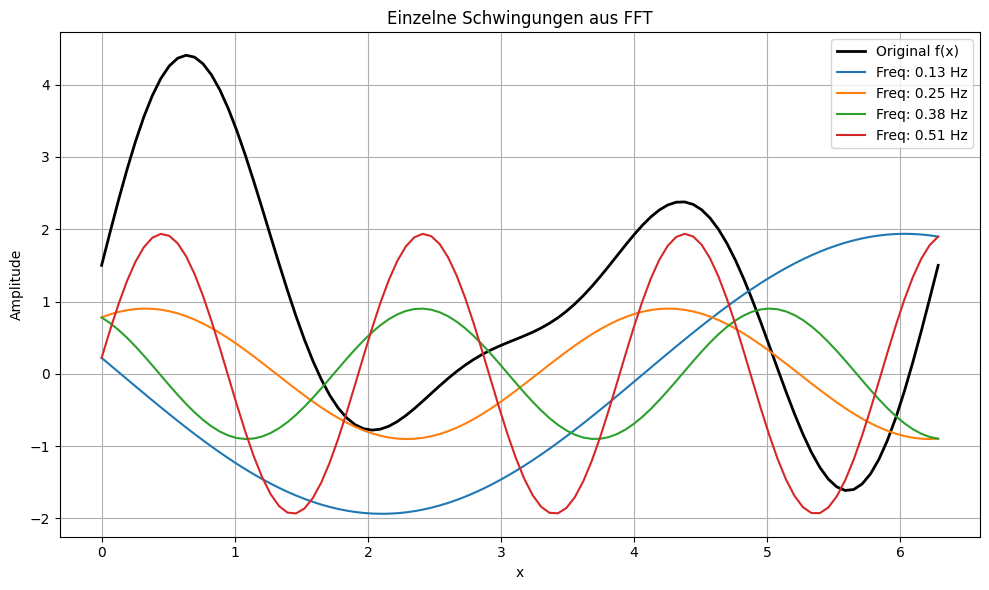

In [392]:
plt.figure(figsize=(10,6))
plt.plot(x_curve, f(x_curve), label='Original f(x)', linewidth=2, color='black')

# Für jede Frequenz (außer DC) ...
for n in range(1, N_SAMPLES):
    # ... erstellen Sie die zugehörige Schwingung
    freq = n / T
    coeff = fhat[n]
    y_single = (coeff * np.exp(1j * 2 * np.pi * freq * x_curve)).real
    
    # ... und plotten Sie diese Schwingung
    plt.plot(x_curve, y_single, label=f'Freq: {freq:.2f} Hz')

plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Einzelne Schwingungen aus FFT')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [389]:
reconstructed_manual

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [385]:
reconstructed

array([1.5 , 0.25, 0.5 , 1.75, 1.5 ])